In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [3]:
TRAIN_DATASET_PATH = '../data/real-estate-price-prediction-moscow/train.csv'
TEST_DATASET_PATH = '../data/real-estate-price-prediction-moscow/test.csv'

##### Описание датасета

- **Id** - идентификационный номер квартиры
- **DistrictId** - идентификационный номер района
- **Rooms** - количество комнат
- **Square** - площадь
- **LifeSquare** - жилая площадь
- **KitchenSquare** - площадь кухни
- **Floor** - этаж
- **HouseFloor** - количество этажей в доме
- **HouseYear** - год постройки дома
- **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
- **Social_1, Social_2, Social_3** - социальные показатели местности
- **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
- **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
- **Price** - цена квартиры

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [5]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(4)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [7]:
print('Строк в тренировочном датасете:', train_df.shape[0])
print('Строк в тестовом датасете', test_df.shape[0])

Строк в тренировочном датасете: 10000
Строк в тестовом датасете 5000


In [8]:
train_df.shape[1] - 1 == test_df.shape[1]

True

###### Приведение типов данных

In [9]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### 1. EDA

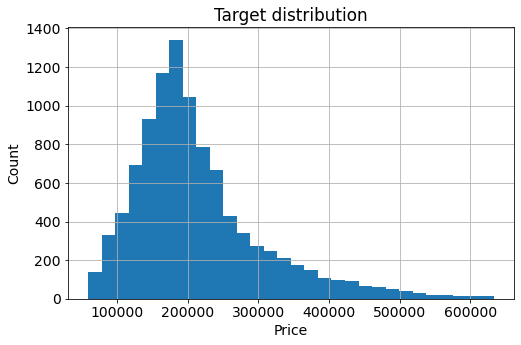

In [10]:
plt.figure(figsize = (8, 5))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

###### Количественные переменные

In [11]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


###### Проблемы с данными на первый взгляд:

- **Rooms** - Минимальное количество 0, что скорее всего является ошибкой. Также странное максимальное значение - 19. Требуется более глубокий анализ на неверные значения.
- **Square** - Минимальное и максимальное значение нереальны для площади квартиры, при этом mean и квантили вполне нормальные. Требуется работа с данными.
- **LifeSquare** - Минимальное и максимальное значение нереальны для площади квартиры, при этом mean и квантили вполне нормальные. Требуется работа с данными. Также макс. значение больше макс. значения Square, что также не может являться истиной.
- **KitchenSquare** - Нереальное максимальное значение, также настораживает минимальное значение равное 0.
- **Floor** - На первый взгляд проблем нет.
- **HouseFloor** - Точно неверное минимальное значение равное 0, и странное макс. значение 117, если посмотреть на среднее 12,6.
- **HouseYear** - Скорее всего неверное максимальное значение
- **Ecology_1, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1** - корректность этих данных мы проверить не сможет, так нет понимания что они означают и в чем выражаются.

In [12]:
def features_hist(df):
    df_num_features = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
    df_num_features.drop('Price', axis=1, inplace=True)
    df_num_features.hist(figsize=(16,16), bins=20, grid=False);

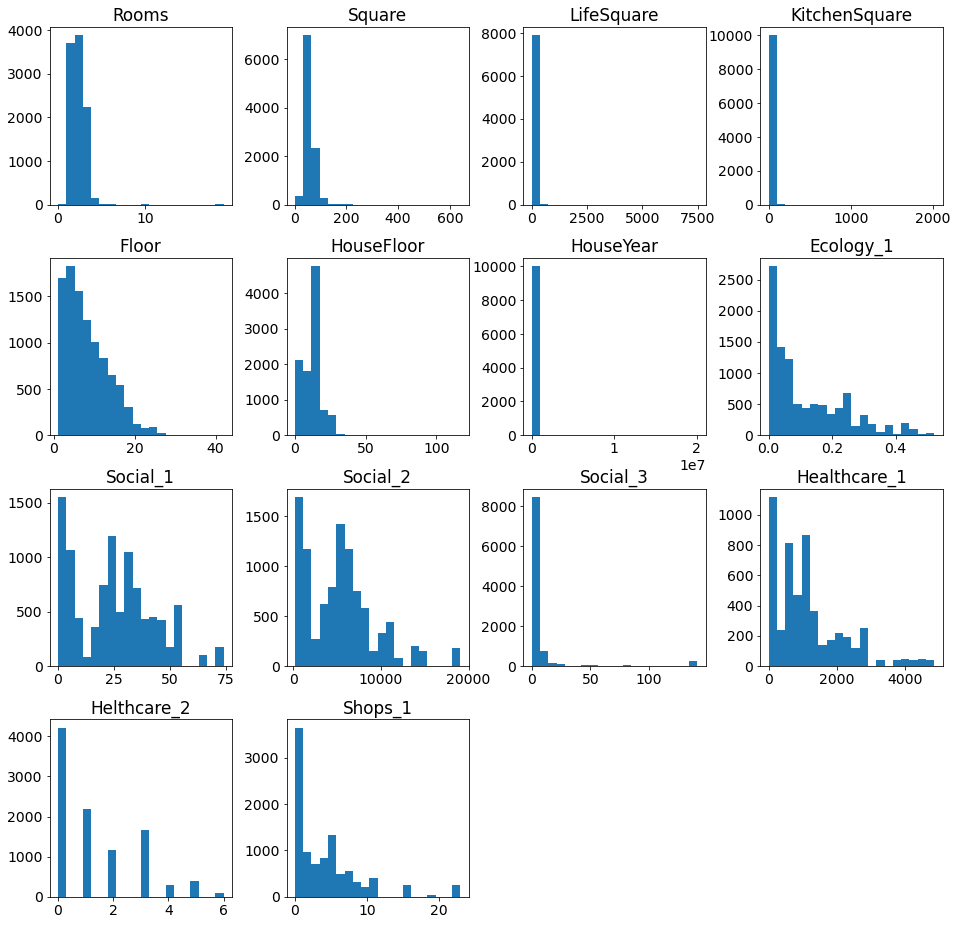

In [13]:
features_hist(train_df)    

Выше распределение признаков тренировочного датасета.
По нему видно, что в некоторых показателях присутствуют выбросы, из-за чего график не слишком показательный.

###### Номинативные переменные

In [14]:
cat_col_names = train_df.select_dtypes(include='object').columns.tolist()
cat_col_names

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [15]:
for cat_col_name in cat_col_names[2:]:
    print(str(cat_col_name) + '\n\n' + str(train_df[cat_col_name].value_counts()) + '\n' + '*' * 100 + '\n')

Ecology_2

B    9903
A      97
Name: Ecology_2, dtype: int64
****************************************************************************************************

Ecology_3

B    9725
A     275
Name: Ecology_3, dtype: int64
****************************************************************************************************

Shops_2

B    9175
A     825
Name: Shops_2, dtype: int64
****************************************************************************************************



###### Ecology_2, Ecology_3, Shops_2

Данные категориальные признаки бинарные, так что перевести их в количественые будет достаточно просто.

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

По выше приведенным данным видно, что есть пропуски в признаках **LifeSquare** и **Healthcare_1**.

### 2. Обработка выбросов

###### Rooms

In [17]:
train_df['Rooms'].value_counts().sort_index()

0.0        8
1.0     3705
2.0     3880
3.0     2235
4.0      150
5.0       18
6.0        1
10.0       2
19.0       1
Name: Rooms, dtype: int64

In [18]:
train_df.loc[train_df['Rooms'] == 6, ['Rooms', 'Square', 'LifeSquare']]

,Rooms,Square,LifeSquare
8794,6.0,59.414334,38.702244


По количеству строк видно, что Rooms со значениями 0, 10, 19 - неверные. 
Также отдельно проверил значение с 6-ю комнатами - из жилой площади на 1 комнату 
приходится 6,3 м.кв. - тоже считаю неверным значением.
Ниже будет функция, которая исправляет эти значения.

In [19]:
def change_wrong_rooms(df):
    
    # Cначала получаю два списка: комнаты, которые надо поменять и нормальные комнаты
    rooms_need_to_change = df['Rooms'].loc[(df['Rooms'] < 1) |  (df['Rooms'] > 5)].unique()
    normal_rooms = np.sort(df['Rooms'].loc[~df['Rooms'].isin(rooms_need_to_change)].unique())
    
    # Получаем датасет без выбросов по Square и Rooms
    temp = df[(df['Square'].isnull() | (df['Square'] < df['Square'].quantile(.995)) &
               (df['Square'] > df['Square'].quantile(.01))) & df['Rooms'].isin(normal_rooms)]
    
    # Получаем список, где средняя площадь квартиры для каждого количества комнат
    mean_sqr = []
    for room in normal_rooms:
        mean_sqr.append(temp['Square'].loc[df['Rooms'].isin([room])].mean())

    
    # Ф-я для поиска ближайшего значения Square в списке mean_sqr
    def nearest(lst, target):
        return min(lst, key=lambda x: abs(x-target))
    
    
    # Замена всех неверных значений комнат на верные
    for wr_room in rooms_need_to_change:
        spam = df.loc[df['Rooms'] == wr_room, ['Square']].iloc[0]['Square']
        df.loc[df['Rooms'] == wr_room, ['Rooms']] = normal_rooms[mean_sqr.index(nearest(mean_sqr, spam))]

In [20]:
change_wrong_rooms(train_df)
train_df['Rooms'].value_counts().sort_index()

1.0    3714
2.0    3883
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

###### LifeSquare (пропуски + выбросы)

In [21]:
train_df['Rooms'].loc[train_df['LifeSquare'] < 7].value_counts()

1.0    95
2.0    75
3.0    31
4.0     3
Name: Rooms, dtype: int64

При изучении признака выяснил, что значениям LifeSquare меньше 7 соответствуют значения Rooms от 1 до 5. 
Учитывая, что показатель Square для значениям LifeSquare меньше 7 являются нормальными (нет очевидных выбросов или ошибок), то можно заключить, что значения LifeSquare меньше 7 являются неверными и требуют замены.

In [22]:
def adjusting_values_lf_sqr(df):
    # Создаем временный датасет, который содержит значения LifeSquare без выбросов и без NaN
    # В дальнейшем по условию "~condition" будет произведена замена выборосов, а также значений NaN
    condition = ((df['LifeSquare'] > 7) & (df['LifeSquare'] < df['LifeSquare'].quantile(.99)))
    temp = df[condition]
    
    # Получаем список, где средняя жилая площадь квартиры для каждого количества комнат
    mean_life_sqr = []
    rooms = list(np.sort(df['Rooms'].unique()))
    for room in rooms:
        mean_life_sqr.append(temp['LifeSquare'].loc[df['Rooms'] == room].mean())
        
    # Для каждой квартиры с некорректным значением LifeSquare получаем уникальные значения, 
    # близкие к средним по каждому количеству комнат
    for room in rooms:
        correct_lf_sqr = round(mean_life_sqr[rooms.index(room)], 2)
        condition_2 = ~condition & (df['Rooms'] == room)
        target = df['LifeSquare'].loc[condition_2]
        
        np.random.seed(15)
        df['LifeSquare'].loc[condition_2] = target.to_frame().apply(lambda x: correct_lf_sqr + np.random.uniform(-5, 5), axis=1)

In [23]:
adjusting_values_lf_sqr(train_df)
train_df['LifeSquare'].describe()

count    10000.000000
mean        35.781557
std         14.054535
min          8.822988
25%         24.088782
50%         33.094325
75%         44.474957
max         95.645828
Name: LifeSquare, dtype: float64

###### Square

In [24]:
train_df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [25]:
def adjusting_values_sqr(df):
    # Создаем временный датасет, который содержит значения Square без выбросов
    # В дальнейшем по условию "~condition" будет произведена замена выборосов
    condition = ((df['Square'] > df['Square'].quantile(.01)) &
                 (df['Square'] < df['Square'].quantile(.99)))
    temp = df[condition]
    
    # Получаем список, где средняя жилая площадь квартиры для каждого количества комнат
    mean_sqr = []
    rooms = list(np.sort(df['Rooms'].unique()))
    for room in rooms:
        mean_sqr.append(temp['Square'].loc[df['Rooms'] == room].mean())
        
    # Для каждой квартиры с некорректным значением Square получаем уникальные значения, 
    # близкие к средним по каждому количеству комнат
    for room in rooms:
        correct_sqr = round(mean_sqr[rooms.index(room)], 2)
        condition_2 = ~condition & (df['Rooms'] == room)
        target = df['Square'].loc[condition_2]
        
        np.random.seed(15)
        df['Square'].loc[condition_2] = target.to_frame().apply(lambda x: correct_sqr + np.random.uniform(-10, 10), axis=1)

In [26]:
adjusting_values_sqr(train_df)
train_df['Square'].describe()

count    10000.000000
mean        55.707330
std         16.985969
min         29.719934
25%         41.864637
50%         52.462026
75%         65.846466
max        117.855969
Name: Square, dtype: float64

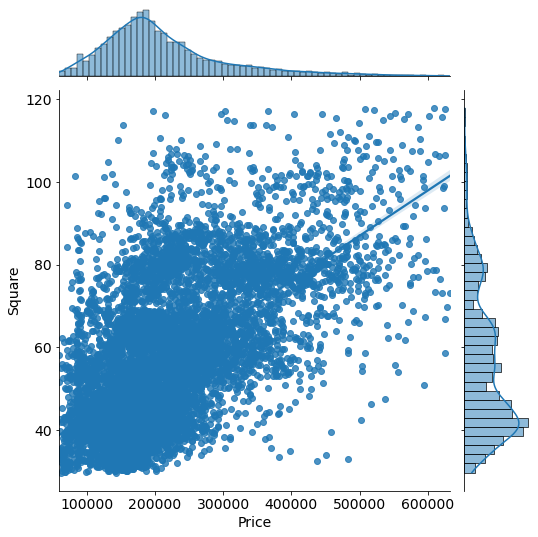

In [27]:
grid = sns.jointplot(train_df['Price'], train_df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

Выше график зависимости цены от площади квартиры. Он показывает прямую зависимость. Но при этом видно, что это не единственный фактор, от которого будет строится цена.

###### KitchenSquare

In [28]:
train_df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [29]:
condition = ((train_df['KitchenSquare'] > 2) &
             (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.99)))
temp = train_df[~condition]
temp['KitchenSquare'].value_counts()

1.0       2460
0.0        697
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
25.0         2
112.0        2
58.0         2
37.0         2
43.0         2
30.0         2
41.0         2
51.0         2
1970.0       1
60.0         1
36.0         1
75.0         1
96.0         1
2014.0       1
23.0         1
26.0         1
40.0         1
78.0         1
84.0         1
53.0         1
66.0         1
27.0         1
73.0         1
29.0         1
21.0         1
35.0         1
42.0         1
48.0         1
31.0         1
39.0         1
123.0        1
62.0         1
63.0         1
72.0         1
54.0         1
Name: KitchenSquare, dtype: int64

In [30]:
temp[['Rooms', 'KitchenSquare']].value_counts()

Rooms  KitchenSquare
1.0    1.0              1047
2.0    1.0               948
3.0    1.0               446
1.0    0.0               293
2.0    0.0               264
                        ... 
       54.0                1
       60.0                1
       62.0                1
       63.0                1
5.0    30.0                1
Length: 72, dtype: int64

In [31]:
temp[['Rooms', 'Square', 'KitchenSquare']].value_counts()

Rooms  Square     KitchenSquare
1.0    29.719934  1.0              1
2.0    65.832954  1.0              1
       65.729426  0.0              1
       65.739179  1.0              1
       65.773749  1.0              1
                                  ..
1.0    48.401698  1.0              1
       48.406065  1.0              1
       48.415335  1.0              1
       48.455708  0.0              1
5.0    88.930769  26.0             1
Length: 3268, dtype: int64

По "train_df['KitchenSquare'].describe()" видно, что в признаке точно присутствуют выбросы. Далее посмотрел соотношение комнатности и значений выбросов в KitchenSquare. Дальше добавил значение Square.
По данным можно с уверенностью предположить, что значения 0 большей части квартир является неверным и требует замены.

In [32]:
def adjusting_values_ktn_sqr(df):
    # Создаем временный датасет, который содержит значения KitchenSquare без выбросов.
    # Стоит отметить что квантили неравномерные. Это сделано специально, т.к. большинство выбросов сосредоточено в 0-х значениях.
    # В дальнейшем по условию "~condition" будет произведена замена выборосов
    condition = ((df['KitchenSquare'] > 2) &
                 (df['KitchenSquare'] < df['KitchenSquare'].quantile(.99)))
    temp = df[condition]
    
    # Получаем список, где средняя жилая площадь квартиры для каждого количества комнат
    mean_ktn_sqr = []
    rooms = list(np.sort(df['Rooms'].unique()))
    for room in rooms:
        mean_ktn_sqr.append(temp['KitchenSquare'].loc[df['Rooms'] == room].mean())
        
    # Для каждой квартиры с некорректным значением KitchenSquare получаем уникальные значения, 
    # близкие к средним по каждому количеству комнат
    for room in rooms:
        correct_ktn_sqr = round(mean_ktn_sqr[rooms.index(room)], 2)
        condition_2 = ~condition & (df['Rooms'] == room)
        target = df['KitchenSquare'].loc[condition_2]
        
        np.random.seed(15)
        df['KitchenSquare'].loc[condition_2] = target.to_frame().apply(lambda x: correct_ktn_sqr + np.random.uniform(-1, 1), axis=1)

In [33]:
adjusting_values_ktn_sqr(train_df)
train_df['KitchenSquare'].describe()

count    10000.000000
mean         7.846865
std          1.844911
min          3.000000
25%          6.837700
50%          8.000000
75%          9.000000
max         15.000000
Name: KitchenSquare, dtype: float64

In [34]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.887500,55.707330,35.781557,7.846865,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.811486,16.985969,14.054535,1.844911,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,1.000000,29.719934,8.822988,3.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.864637,24.088782,6.837700,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.462026,33.094325,8.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.846466,44.474957,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,5.000000,117.855969,95.645828,15.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


###### Square	LifeSquare	KitchenSquare

Еще на этапе EDA было видно, что Square для некоторых квартир меньше суммы LifeSquare и KitchenSquare, что противоречит логике.
Ниже небольоше исследование, по итогам которого я считаю, что данным расхождением можно пренебречь.

In [35]:
condition = train_df['Square'] < train_df['LifeSquare'] + train_df['KitchenSquare']
train_df.loc[condition]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8,9951,1,1.0,46.887892,44.628132,7.127792,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,9.127635,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945
19,367,45,1.0,42.367289,40.012529,7.493077,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
33,847,74,2.0,73.314975,74.131261,6.897792,7,6.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,254005.381863
34,7757,27,2.0,58.783661,55.441256,11.000000,13,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,138396.984612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,14175,14,1.0,42.029175,44.682167,10.000000,4,4.0,2018,0.238617,B,B,26,3889,6,705.0,3,6,B,87556.385617
9965,6441,52,3.0,85.796885,85.305246,7.564493,15,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,204462.983720
9979,2201,6,1.0,40.043234,41.984322,7.452416,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,134888.083598
9987,11665,1,2.0,62.690057,64.602939,10.000000,19,22.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,203908.192698


In [36]:
temp = train_df.loc[(train_df['Square'] - train_df['LifeSquare'] - train_df['KitchenSquare']) < 0]

In [37]:
temp['S-L-K'] = temp.apply(lambda temp: temp['Square'] - temp['LifeSquare'] - temp['KitchenSquare'], axis=1)

In [38]:
temp['S-L-K'].mean()

-7.170594618466754

###### HouseFloor, Floor

In [39]:
# Как мы видим выбросов (значения 99 и 117) немного, поэтому их можно не убирать. 
train_df['HouseFloor'].value_counts().sort_index().tail(10)

37.0     4
38.0     1
39.0     2
40.0     7
44.0     1
45.0     1
47.0     1
48.0     2
99.0     2
117.0    1
Name: HouseFloor, dtype: int64

In [40]:

train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [41]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

Как видно из двух предыдущих ячеек, в HouseFloor есть значение 0, которое явно лишнее, учитыая что Floor начинается с 1.
Также нужно проверить и изменить те случаи, когда Floor больше HouseFloor.

In [42]:
def adjust_floor_housefloor(df):
    # Меняем все значения HouseFloor равные нулю и NaN на медиану
    df.loc[~(df['HouseFloor'] > 0), 'HouseFloor'] = int(df['HouseFloor'].median())
    
    # Ищем те значения Floor, которые больше, чем всего этажей в доме
    np.random.seed(15)
    floor_outliers = df[df['Floor'] > df['HouseFloor']].index
    
    # Меняем нелогичные значения этажей на произвольный этаж в доме
    df.loc[floor_outliers, 'Floor'] = df.loc[floor_outliers, 'HouseFloor'].apply(
        lambda x: random.randint(1, x)
    )

In [43]:
adjust_floor_housefloor(train_df)

###### HouseYear

In [44]:
train_df['HouseYear'].value_counts().sort_index()

1910          1
1912          2
1914          1
1916          1
1917          3
           ... 
2018        175
2019         79
2020         19
4968          1
20052011      1
Name: HouseYear, Length: 97, dtype: int64

Последние значения явно являются некорректными и требуют замены

In [45]:
def adjust_houseyear(df):
    df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020
    

adjust_houseyear(train_df)

### 3. Обработка Пропусков

Пропуски у нас были только в двух признаках: LifeSquare и Healthcare_1.

Пропуски LifeSquare были обработаны вместе с обработкой выбросов и заменены на средние +- (за счет random) значения LifeSquare для каждого количества комнат.

###### Healthcare_1

In [46]:
train_df['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

In [47]:
train_df['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

Есть разные значения признака, какой-то зависимости не видно. Какого-то описания признака тоже нет.
Принял решение заменить пропуски на random значение в рамках мин. и макс. значения.

In [48]:
def fill_gaps_Healthcare_1(df):
    np.random.seed(15)
    condition = df['Healthcare_1'].isnull(), 'Healthcare_1'
    
    df.loc[condition] = df.loc[condition].apply(
        lambda x: random.randint(df['Healthcare_1'].min(), df['Healthcare_1'].max())
    )

In [49]:
fill_gaps_Healthcare_1(train_df)

In [50]:
train_df['Healthcare_1'].describe()

count    10000.000000
mean      1755.789800
std       1374.987121
min          0.000000
25%        562.000000
50%       1340.000000
75%       2716.250000
max       4849.000000
Name: Healthcare_1, dtype: float64

### 4. Построение новых признаков

###### Dummies

In [51]:
def binary_to_numbers(df):
    # Делаем бинарные признаки Ecology_2, Ecology_3 и Shops_2 числовыми
    
    bin_to_num = {'A': 0, 'B': 1}
    
    df['Ecology_2'] = df['Ecology_2'].replace(bin_to_num)
    df['Ecology_3'] = df['Ecology_3'].replace(bin_to_num)
    df['Shops_2'] = df['Shops_2'].replace(bin_to_num)
    df[['Ecology_2', 'Ecology_3', 'Shops_2']] = df[['Ecology_2', 'Ecology_3', 'Shops_2']].astype(np.int8)
    

binary_to_numbers(train_df)

###### DistrictSize, IsDistrictLarge

In [52]:
def add_districtsize_and_isdistrictlarge(df):
    # Формируем промежуточный датафрейм, где будет размер районов
    district_size = df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
    
    # Добавляем признак DistrictSize в датафрейм
    df = df.merge(district_size, on='DistrictId', how='left')
    
    # Добавляем бинарный признак IsDistrictLarge в датафрейм, для DistrictSize больше 100 присваиваем значение 1
    df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)
    return df

In [53]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [54]:
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3.0,115.027311,53.488177,10.000000,4,10.0,2014,0.075424,...,1,11,3097,0,4323.0,0,0,1,305018.871089,851
1,3013,22,1.0,39.832524,23.169223,8.000000,7,8.0,1966,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,78
2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,652
3,2352,1,1.0,40.409907,28.908177,8.467635,10,22.0,1977,0.007122,...,1,1,264,0,3290.0,0,1,1,168106.007630,652
4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,0.282798,...,1,33,8667,2,4163.0,0,6,1,343995.102962,89


In [55]:
(train_df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [56]:
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge
0,11809,27,3.0,115.027311,53.488177,10.000000,4,10.0,2014,0.075424,...,11,3097,0,4323.0,0,0,1,305018.871089,851,1
1,3013,22,1.0,39.832524,23.169223,8.000000,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,1,177734.553407,78,0
2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,1,282078.720850,652,1
3,2352,1,1.0,40.409907,28.908177,8.467635,10,22.0,1977,0.007122,...,1,264,0,3290.0,0,1,1,168106.007630,652,1
4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,0.282798,...,33,8667,2,4163.0,0,6,1,343995.102962,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.000000,3,12.0,1981,0.300323,...,52,10311,6,4356.0,1,9,1,119367.455796,118,1
9996,16265,27,2.0,64.307684,37.038420,9.000000,13,13.0,1977,0.072158,...,2,629,1,2758.0,0,0,0,199715.148807,851,1
9997,2795,178,1.0,50.115249,16.555363,5.000000,3,5.0,1958,0.460556,...,20,4386,14,1992.0,1,5,1,165953.912580,7,0
9998,14561,21,1.0,32.330292,22.326870,5.000000,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,1,171842.411855,165,1


###### MedPriceByDistrict, MedSquareByDistrict, MedPricePerSqMeterByDistrict

Добавляем новые признаки:
- **MedPriceByDistrict** - медиана цены каждой комнатности для каждого района
- **MedSquareByDistrict** - медиана площади квартиры каждой комнатности для каждого района
- **MedPricePerSqMeterByDistrict** - Стоимость квадратного метра квартиры каждой комнатности для каждого района на основе двух предыдущих признаков

In [57]:
train_df['DistrictId']

0        27
1        22
2         1
3         1
4        94
       ... 
9995     61
9996     27
9997    178
9998     21
9999     94
Name: DistrictId, Length: 10000, dtype: object

In [58]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price': 'median'})\
    .rename(columns={'Price':'MedPriceByDistrict'})
med_price_by_district

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146574.015522
4,1,2.0,202706.090239
...,...,...,...
662,98,3.0,245090.013271
663,98,4.0,450946.459365
664,99,1.0,158539.052715
665,99,2.0,187726.339855


In [59]:
def add_med_price_by_district(df):
    # Вычисление медианы цены каждой комнатности для каждого района
    med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg(
        {'Price': 'median'}).rename(columns={'Price':'MedPriceByDistrict'})
    
    return df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')

    
def add_med_square_by_district(df):
    # Вычисление медианы площади каждой комнатности для каждого района
    med_square_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg(
        {'Square': 'median'}).rename(columns={'Square':'MedSquareByDistrict'})
    
    return df.merge(med_square_by_district, on=['DistrictId', 'Rooms'], how='left')

    
def add_med_price_per_sq_meter_by_district(df):
    # Вычисления стоимости одного квадратного метра каждой комнатности для каждого района
    return df['MedPriceByDistrict'] / df['MedSquareByDistrict']
    

In [60]:
train_df = add_med_price_by_district(train_df)
train_df = add_med_square_by_district(train_df)
train_df['MedPricePerSqMeterByDistrict'] = add_med_price_per_sq_meter_by_district(train_df)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict,MedSquareByDistrict,MedPricePerSqMeterByDistrict
0,11809,27,3.0,115.027311,53.488177,10.000000,4,10.0,2014,0.075424,...,4323.0,0,0,1,305018.871089,851,1,213530.788443,81.780791,2611.013968
1,3013,22,1.0,39.832524,23.169223,8.000000,7,8.0,1966,0.118537,...,1183.0,1,0,1,177734.553407,78,0,146032.829834,39.956966,3654.752746
2,8215,1,3.0,78.342215,47.671972,10.000000,2,17.0,1988,0.025609,...,240.0,3,1,1,282078.720850,652,1,244005.272380,81.639538,2988.812517
3,2352,1,1.0,40.409907,28.908177,8.467635,10,22.0,1977,0.007122,...,3290.0,0,1,1,168106.007630,652,1,146574.015522,42.526759,3446.630315
4,13866,94,2.0,64.285067,38.562517,9.000000,16,16.0,1972,0.282798,...,4163.0,0,6,1,343995.102962,89,0,201584.441255,47.802228,4217.051183


In [61]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,MedPriceByDistrict,MedSquareByDistrict,MedPricePerSqMeterByDistrict
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887500,55.707330,35.781557,7.846865,7.411700,12.95910,1984.872400,0.118858,0.990300,0.972500,...,1755.789800,1.319500,4.231300,0.917500,214138.857399,242.306600,0.506900,211462.815644,55.155708,3886.723701
std,0.811486,16.985969,14.054535,1.844911,5.037156,6.44346,18.416347,0.119025,0.098015,0.163543,...,1374.987121,1.493601,4.806341,0.275139,92872.293865,268.992652,0.499977,76574.526856,15.357691,1023.077213
min,1.000000,29.719934,8.822988,3.000000,1.000000,1.00000,1910.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,59174.778028,1.000000,0.000000,82342.775873,31.162884,810.825491
25%,1.000000,41.864637,24.088782,6.837700,3.000000,9.00000,1974.000000,0.017647,1.000000,1.000000,...,562.000000,0.000000,1.000000,1.000000,153872.633942,55.000000,0.000000,165071.825722,42.087953,2988.812517
50%,2.000000,52.462026,33.094325,8.000000,6.000000,13.00000,1977.000000,0.075424,1.000000,1.000000,...,1340.000000,1.000000,3.000000,1.000000,192269.644879,104.000000,1.000000,195474.299127,49.847125,3986.471104
75%,2.000000,65.846466,44.474957,9.000000,11.000000,17.00000,2001.000000,0.195781,1.000000,1.000000,...,2716.250000,2.000000,6.000000,1.000000,249135.462171,511.000000,1.000000,241068.903045,64.153201,4512.312277
max,5.000000,117.855969,95.645828,15.000000,42.000000,117.00000,2020.000000,0.521867,1.000000,1.000000,...,4849.000000,6.000000,23.000000,1.000000,633233.466570,851.000000,1.000000,624156.003381,117.855969,11854.652892


Распределение признаков тренировочного датасета после работы с выбросами и пропусками, а также после добавления новых фич

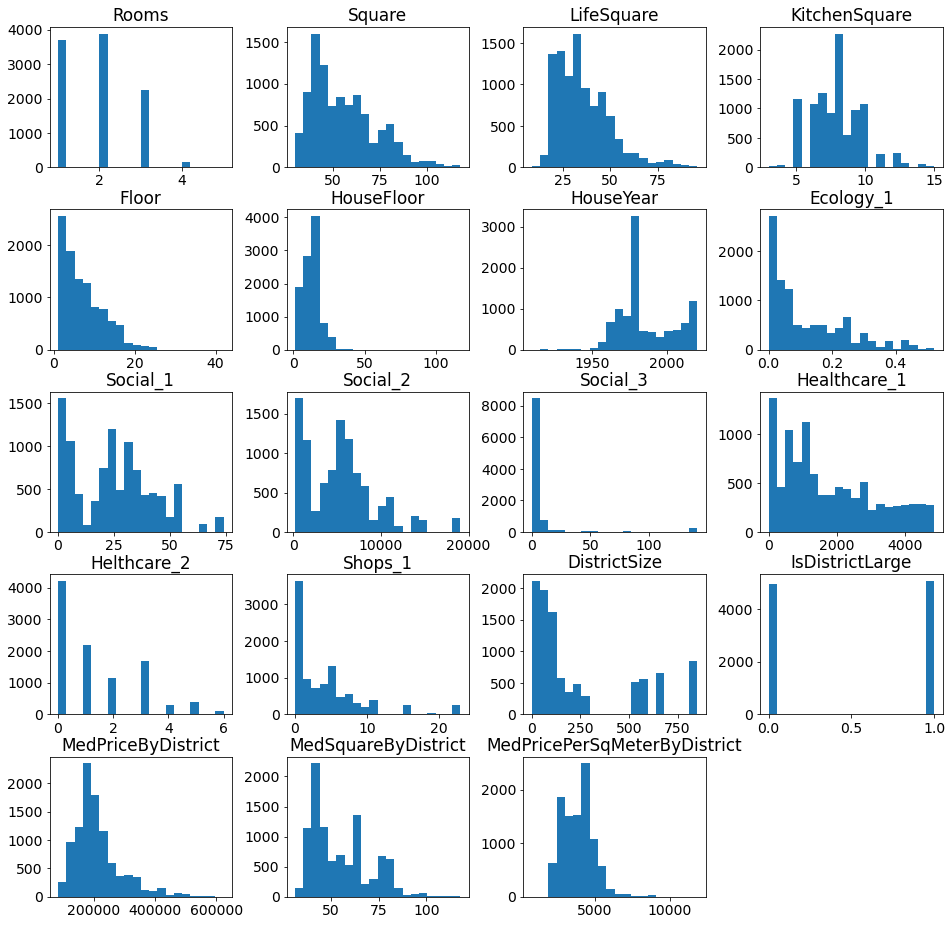

In [62]:
features_hist(train_df)

### 5. Перенос признаков на тест

In [63]:
def feature_genetator(df, train_df):
    
    df['Id'] = df['Id'].astype(str)
    df['DistrictId'] = df['DistrictId'].astype(str)
    
    change_wrong_rooms(df)
    
    adjusting_values_lf_sqr(df)
    
    adjusting_values_sqr(df)
    
    adjusting_values_ktn_sqr(df)
    
    adjust_floor_housefloor(df)
    
    adjust_houseyear(df)
    
    fill_gaps_Healthcare_1(df)
    
    binary_to_numbers(df)
    
    df = add_districtsize_and_isdistrictlarge(df)
    
    med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg(
        {'Price': 'median'}).rename(columns={'Price':'MedPriceByDistrict'})
    df = df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
    
    # В признаке MedPriceByDistrict образовалось несколько значений NaN - заменим на медиану
    df.loc[df['MedPriceByDistrict'].isna(), 'MedPriceByDistrict'] = train_df['MedPriceByDistrict'].median()
    
    med_square_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg(
        {'Square': 'median'}).rename(columns={'Square':'MedSquareByDistrict'})
    
    df = df.merge(med_square_by_district, on=['DistrictId', 'Rooms'], how='left')
    
    df['MedPricePerSqMeterByDistrict'] = df['MedPriceByDistrict'] / df['MedSquareByDistrict']
    
    return df

In [64]:
test_df = feature_genetator(test_df, train_df)
# test_df.loc[test_df['MedPriceByDistrict'].isna(), 'MedPriceByDistrict'] = train_df['MedPriceByDistrict'].median()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            5000 non-null   object 
 1   DistrictId                    5000 non-null   object 
 2   Rooms                         5000 non-null   float64
 3   Square                        5000 non-null   float64
 4   LifeSquare                    5000 non-null   float64
 5   KitchenSquare                 5000 non-null   float64
 6   Floor                         5000 non-null   int64  
 7   HouseFloor                    5000 non-null   float64
 8   HouseYear                     5000 non-null   int64  
 9   Ecology_1                     5000 non-null   float64
 10  Ecology_2                     5000 non-null   int8   
 11  Ecology_3                     5000 non-null   int8   
 12  Social_1                      5000 non-null   int64  
 13  Soc

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            10000 non-null  object 
 1   DistrictId                    10000 non-null  object 
 2   Rooms                         10000 non-null  float64
 3   Square                        10000 non-null  float64
 4   LifeSquare                    10000 non-null  float64
 5   KitchenSquare                 10000 non-null  float64
 6   Floor                         10000 non-null  int64  
 7   HouseFloor                    10000 non-null  float64
 8   HouseYear                     10000 non-null  int64  
 9   Ecology_1                     10000 non-null  float64
 10  Ecology_2                     10000 non-null  int8   
 11  Ecology_3                     10000 non-null  int8   
 12  Social_1                      10000 non-null  int64  
 13  So

### 6. Отбор признаков

In [66]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'MedSquareByDistrict',
 'MedPricePerSqMeterByDistrict']

In [67]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2',]

new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'MedPriceByDistrict', 'MedSquareByDistrict',
 'MedPricePerSqMeterByDistrict']

target_name = 'Price'

In [68]:
train_df.shape

(10000, 25)

In [69]:
test_df.shape

(5000, 24)

### 7. Разбиение на train и test

In [70]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [72]:
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=25,
                                        n_estimators=100)

final_model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          random_state=25)

Train R2:	0.856
Test R2:	0.743


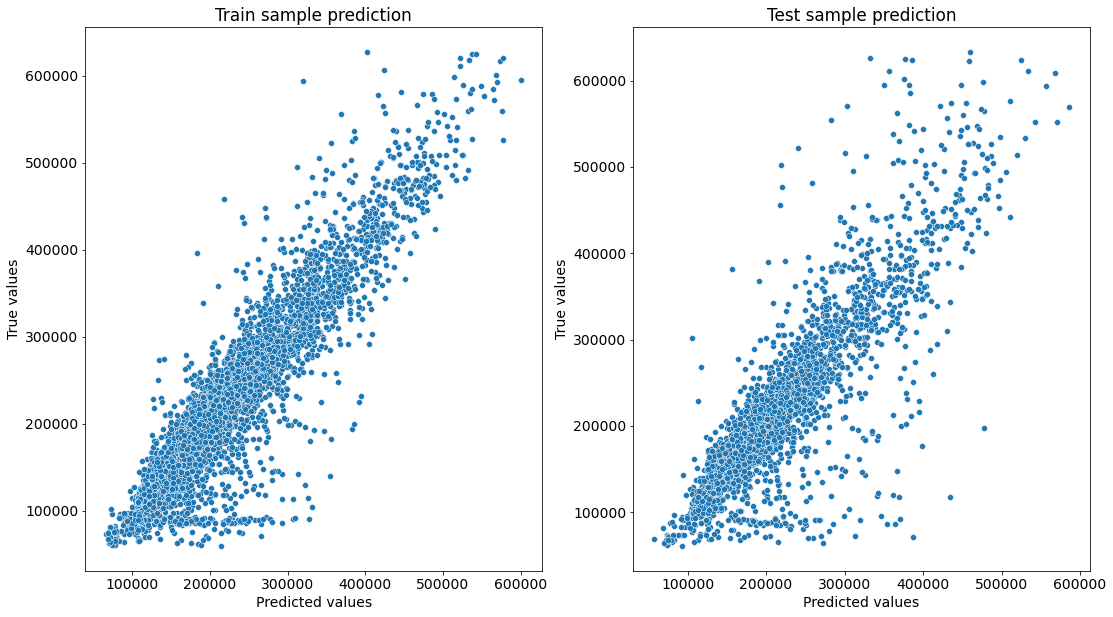

In [73]:
y_train_preds = final_model.predict(X_train)
y_test_preds = final_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

###### Важность признаков

In [74]:
features_importances = pd.DataFrame(zip(X_train.columns, final_model.feature_importances_),
                                   columns=['feature_name', 'importance'])
features_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
19,MedPriceByDistrict,0.707146
1,Square,0.104472
21,MedPricePerSqMeterByDistrict,0.044543
3,KitchenSquare,0.027086
20,MedSquareByDistrict,0.017830
6,HouseYear,0.017579
5,HouseFloor,0.013888
17,DistrictSize,0.010634
11,Social_2,0.009551
2,LifeSquare,0.008977


### 8. Прогнозирование на тестовом датасете

In [75]:
submit = pd.read_csv( '../data/real-estate-price-prediction-moscow/sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [76]:
predictions = final_model.predict(test_df[feature_names + new_feature_names])
predictions, predictions.shape

(array([158299.91005687, 125596.72116448, 152560.30555381, ...,
        146004.26789342, 169538.30359691, 313502.77461971]),
 (5000,))

In [77]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,158299.910057
1,5925,125596.721164
2,960,152560.305554
3,3848,129205.131002
4,746,173794.891734


In [78]:
submit.to_csv('rf_submit.csv', index=False)